# cross-section weights of 1/efficiency

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


## load mc and data

In [2]:
versions['overlay date'] = '2018_09_20'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
versions['data date'] = '2018_08_16'
versions['beam on'] = 'prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off'] = 'prod_reco_optfilter_extbnb_v12_mcc8_dev'
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data()
# genie_CC1p['theta_12'] = 180./np.pi*np.arccos((genie_CC1p['truth_Pp_x']*genie_CC1p['truth_Pmu_x']
#                                                                    +genie_CC1p['truth_Pp_y']*genie_CC1p['truth_Pmu_y']
#                                                                    +genie_CC1p['truth_Pp_z']*genie_CC1p['truth_Pmu_z'])
#                                                                   /(genie_CC1p['truth_Pp']*genie_CC1p['truth_Pmu']))
# genie_CC1p['Pt'] = np.sqrt(np.square(genie_CC1p['truth_Pp_x']+genie_CC1p['truth_Pmu_x'])
#                                                +np.square(genie_CC1p['truth_Pp_y']+genie_CC1p['truth_Pmu_y']))
# genie_CC1p['delta_phi'] = 180./np.pi*np.abs(genie_CC1p['truth_Pp_phi']-genie_CC1p['truth_Pmu_phi'])

found selected_cosmic.csv, loading it...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_selected_on_beam.csv and found the file...
100 events in genie from overlay
saved 6 CC1p events in genie_CC1p to /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_20_selected_genie_CC1p.csv
0 selected CC1p events overlay


In [25]:
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

285038 ccqe candidate pairs, 180092 in FV
74392 are 1mu-1p, 41.3%
55230 are other-pairs, 30.7%
155416 are cosmic, 86.3%
--------------------------------------------------------------
0 are CC1p0pi, 0.0%
--------------------------------------------------------------
3503 are CC1p, 1.9%
I finished loading overlay samples. We have in total 285038 pairs


{'1mu-1p':         Unnamed: 0   run  subrun  event  vertex_id         x           y  \
 0                0  7010     211  10552          0  252.6690  -83.095000   
 1                1  7010     211  10556          0  227.7100   30.823300   
 4                4  7010     211  10569          0  151.3190   47.856300   
 12              12  7010     211  10597          0  201.1050   99.025600   
 16              16  7001     868  43410          0  211.2060  -22.165400   
 20              20  7001     868  43418          0   97.7544  -79.879500   
 29              29  7001     868  43442          0  107.3190   83.132100   
 31              31  7001     868  43449          0  181.5870   -0.464370   
 37              37  7020    1898  94922          0  194.6160   65.576300   
 38              38  7020    1898  94925          0  231.1420   42.168400   
 43              43  7020    1898  94935          0   59.1255  -89.894500   
 49              49  7006     386  19331          0  207.5030   43

In [28]:
len(OverlaySamples['CC1p0pi'])

0

In [7]:
overlay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/2018_09_20/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_09_20_vertices.csv')
CC1p = overlay[overlay['CC1p']==True]
print len(overlay[overlay['other-pairs']==True])
print len(CC1p)
CC1p.truth_Pmu_cos_theta

6
4


0     0.733082
5     0.906722
13    0.861083
15    0.662761
Name: truth_Pmu_cos_theta, dtype: float64

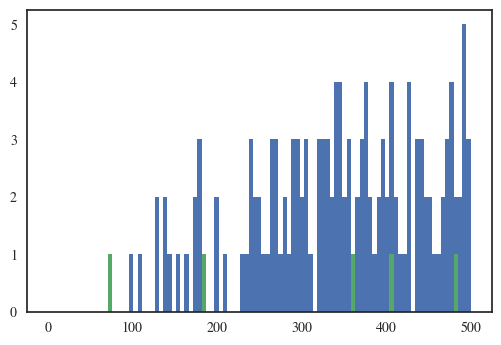

In [33]:
plt.hist(OverlaySamples['CC1p']['MatchedFlash_TotalPE']
         ,bins=linspace(0,500,100));
plt.hist(CC1p['MatchedFlash_TotalPE']
         ,bins=linspace(0,500,100));

In [7]:
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash','length'
                   ,'non-collinearity','vertex activity'
                   ,'delta phi','Pt & delta phi']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples, cuts_order=cuts_order)

ZeroDivisionError: float division by zero

In [111]:
afro_genie_dict = dict()
afro_genie_CC1p_dict = dict()
afro_genie_CC1p_nocut_dict = dict()
path = '/Users/erezcohen/Desktop/uBoone/CCQEanalysis/afro_genie_samples/'
genie_list = ['nominal','hA2015','hA_SRC','hA_Tune3']#,'hN2015'
for gname in genie_list: 
    afro_genie_dict[gname] = pd.read_csv(path + 'CC_4_9E20_POT_mA_0_99'+'_'+gname+'.csv')
    print 'loaded',gname
    afro_genie = afro_genie_dict[gname]
    afro_genie_contained = afro_genie[(afro_genie.IsCC_1p_200MeVc==True)
                        & ((afro_genie.v_x>3) & (afro_genie.v_x<256))                        
                        & ((afro_genie.v_y>-115) & (afro_genie.v_y<115))                        
                        & ((afro_genie.v_z>5) & (afro_genie.v_z<1037))                        
                       ]
    afro_genie_in_limits = sample_in_limits(sam=afro_genie_contained
                                   ,varPmu='truth_Pmu',varPmu_cos_theta='truth_Pmu_cos_theta'
                                   ,varPp='truth_Pp',varPp_cos_theta='truth_Pp_cos_theta')
    afro_genie_CC1p = afro_genie_in_limits[afro_genie_in_limits['IsCC_1p_200MeVc']==True]
    print len(afro_genie_CC1p),'afro GENIE CC1p'
    afro_genie_CC1p_nocut_dict[gname] = afro_genie_CC1p
    # kinematical cuts
    delta_theta_12=55  # deg.
    delta_Delta_phi=35 # deg.
    Pt_max=0.35        # GeV/c
    afro_genie_CC1p_in_cuts = afro_genie_CC1p[(np.abs(afro_genie_CC1p['theta_12']-90)<delta_theta_12)
                                              &(afro_genie_CC1p['Pt']<Pt_max)
                                              &(np.abs(afro_genie_CC1p['delta_phi']-180.)<delta_Delta_phi)]
    print len(afro_genie_CC1p_in_cuts),'afro GENIE CC1p in kinematical cuts'
    afro_genie_CC1p_dict[gname] = afro_genie_CC1p_in_cuts    

loaded nominal
37114 afro GENIE CC1p
27303 afro GENIE CC1p in kinematical cuts
loaded hA2015
37532 afro GENIE CC1p
27121 afro GENIE CC1p in kinematical cuts
loaded hA_SRC
33822 afro GENIE CC1p
24593 afro GENIE CC1p in kinematical cuts
loaded hA_Tune3
37257 afro GENIE CC1p
29095 afro GENIE CC1p in kinematical cuts


## computation of effiency weights

In [3]:
for key in Limits.keys(): Bins[key] = np.linspace(Limits[key][0],Limits[key][1],NBins+1)
bins1,bins2,bins3 = Bins['Pmu'], Bins['cos(theta(mu))'] , Bins['phi(mu)']
N1,N2,N3 = len(bins1)-1,len(bins2)-1,len(bins3)-1

In [179]:
def compute_eff_weights(beam_on=None,beam_off=None
                       ,generated_CC1p=None,selected_CC1p=None,overlay=None
                       ,NBins=7
                       ,option=None
                       ,ob_1='Pmu',ob_2='cos(theta(mu))',ob_3='phi(mu)'
                       ,reco_1='reco_Pmu_mcs',reco_2='reco_Pmu_cos_theta',reco_3='reco_Pmu_mcs_phi'
                       ,true_1='truth_Pmu',true_2='truth_Pmu_cos_theta',true_3='truth_Pmu_phi'
                       # for fixing muon bins
                       ,do_in_kin_cuts=True
                       ,delta_theta_12=55  # deg.
                       ,delta_Delta_phi=35 # deg.                
                       ,Pt_max=0.35        # GeV/c
                       ,debug=0
                      ):
    # the return is a dictionary of results    
    for key in Limits.keys(): Bins[key] = np.linspace(Limits[key][0],Limits[key][1],NBins+1)
    global bins1,bins2,bins3,N1,N2,N3
    bins1,bins2,bins3 = Bins[ob_1], Bins[ob_2] , Bins[ob_3]
    N1,N2,N3 = len(bins1)-1,len(bins2)-1,len(bins3)-1
    N,List = dict(),dict()
    for i_P in range(N1):#{
        Pmin,Pmax = bins1[i_P],bins1[i_P+1]

        for i_cos_theta in range(N2):#{
            cos_theta_min,cos_theta_max = bins2[i_cos_theta],bins2[i_cos_theta+1]

            for i_phi in range(N3):#{
                phi_min,phi_max = bins3[i_phi],bins3[i_phi+1]

                
                N['on'],List['on'] = len_sam_in_3d_bin(beam_on,
                                               reco_1,Pmin,Pmax,
                                               reco_2,cos_theta_min,cos_theta_max,
                                               reco_3,phi_min,phi_max)
                
                N['off'],List['off'] = len_sam_in_3d_bin(beam_off,
                                               reco_1,Pmin,Pmax,
                                               reco_2,cos_theta_min,cos_theta_max,
                                               reco_3,phi_min,phi_max)

                N['generated'],List['generated'] = len_sam_in_3d_bin(generated_CC1p,
                                               true_1,Pmin,Pmax,
                                               true_2,cos_theta_min,cos_theta_max,
                                               true_3,phi_min,phi_max)
                generated_CC1p_in_kin_cuts = generated_CC1p[(np.abs(generated_CC1p['theta_12']-90)<delta_theta_12)                                              
                                                            &(generated_CC1p['Pt']<Pt_max)
                                                            &(np.abs(generated_CC1p['delta_phi']-180.)<delta_Delta_phi)]
                N['gen. in kin. cuts'],List['gen. in kin. cuts'] = len_sam_in_3d_bin(generated_CC1p_in_kin_cuts,
                                               true_1,Pmin,Pmax,
                                               true_2,cos_theta_min,cos_theta_max,
                                               true_3,phi_min,phi_max)

                N['CC1p'],List['CC1p'] = len_sam_in_3d_bin(selected_CC1p,
                                               reco_1,Pmin,Pmax,
                                               reco_2,cos_theta_min,cos_theta_max,
                                               reco_3,phi_min,phi_max)

                
                N['overlay'],List['overlay'] = len_sam_in_3d_bin(overlay,
                                               reco_1,Pmin,Pmax,
                                               reco_2,cos_theta_min,cos_theta_max,
                                               reco_3,phi_min,phi_max)
                

                Ngen=N['gen. in kin. cuts'] if do_in_kin_cuts else N['generated']
                eff, eff_err = get_eff(Ngen=Ngen , Nsel=N['CC1p'])
                    
                # efficiency weight assigned to the event
                w,werr=0,0
                if eff>0:
                    w = 1.e39/(eff*flux*Ntargets)
                    werr = 1.e39*eff_err/(eff*eff*flux*Ntargets)
                    
                if debug: 
                    print 'eff=',eff,'+/-',eff_err
                    print 'w=',w,'+/-',werr
                
                beam_on.loc[List['on'],ob_1+' weight'] = w
                beam_on.loc[List['on'],ob_1+' weight err'] = werr
                
                beam_off.loc[List['off'],ob_1+' weight'] = w
                beam_off.loc[List['off'],ob_1+' weight err'] = werr

                selected_CC1p.loc[List['CC1p'],ob_1+' weight'] = w
                selected_CC1p.loc[List['CC1p'],ob_1+' weight err'] = werr
                
                overlay.loc[List['overlay'],ob_1+' weight'] = w
                overlay.loc[List['overlay'],ob_1+' weight err'] = werr                
            #} i_phi
        #} i_cos_theta
    #} i_P
    print 'done.'  
    return 

In [279]:
compute_eff_weights(NBins=7,debug=0,
                       beam_on=selected_beam_on,
                       beam_off=selected_beam_off,                       
                       generated_CC1p=genie_CC1p,                       
                       selected_CC1p=selected_CC1p ,                       
                       overlay=selected_overlay_concat) 

done.


In [280]:
compute_eff_weights(NBins=7,debug=0,
                       beam_on=selected_beam_on,
                       beam_off=selected_beam_off,                       
                       generated_CC1p=genie_CC1p,                       
                       selected_CC1p=selected_CC1p ,                       
                       overlay=selected_overlay_concat
                       ,ob_1='Pp',ob_2='cos(theta(p))',ob_3='phi(p)'
                       ,reco_1='reco_Pp',reco_2='reco_Pp_cos_theta',reco_3='reco_Pp_phi'
                       ,true_1='truth_Pp',true_2='truth_Pp_cos_theta',true_3='truth_Pp_phi')

done.


# plot Xsec.

## The value and uncertainty in weighted distributions

$$N_j = \sum_{i\in j}(1\times w_i)$$

$$\Delta N_j
=
\sqrt{\sum_{i\in j} \left[\left( 1 \times \Delta w_i \right)^2 + \left(\sqrt{1} \times w_i \right)^2\right]}
=
\sqrt{\sum_{i\in j}\left(  \Delta w_i ^2 +  w_i^2 \right)}
$$



In [317]:
def get_Xsec_1d(beam_on=None,beam_off=None,overlay=None,CC1p=None,
                var='reco_Pmu_mcs',bins=Bins['Pmu'],wname='Pmu weight',
                mul=1,
                do_corr_phi_0=False):
    bin_width = bins[1]-bins[0]
    h=dict()
    for sam,slabel in zip([beam_on,beam_off,overlay,CC1p]                       
                          ,['beam on','beam off','overlay','CC1p']):
        h[slabel],h[slabel+' err']=np.zeros(len(bins)-1),np.zeros(len(bins)-1)
        for i in range(len(bins)-1):
            sam_in_bin = sam[(bins[i]<=mul*sam[var])& (mul*sam[var]<bins[i+1])]
            h[slabel][i] = np.sum(sam_in_bin[wname])
            if do_corr_phi_0:
                h[slabel][i] = np.sum(sam_in_bin[wname]*sam_in_bin['W(corr. phi~0)'])                
            h[slabel+' err'][i] = np.sqrt(np.sum(np.square(sam_in_bin[wname+' err'])
                                                 +np.square(sam_in_bin[wname])))
            
    h['B'] = h['overlay'] - h['CC1p']
    h['B err'] = np.sqrt(np.square(h['overlay err']) + np.square(h['CC1p err']))

    h['B scaled'] = h['B']*Nevents['f(POT)']
    h['B scaled err'] = h['B err']*Nevents['f(POT)']

    #     print "h['beam off err']:",h['beam off err']
    h['beam off scaled'] = h['beam off']*OffBeam_scaling
    h['beam off scaled err'] = h['beam off err']*OffBeam_scaling

    h['N(on)-N(off)-B'] = h['beam on'] - h['beam off scaled'] - h['B scaled']
    h['N(on)-N(off)-B err'] = np.sqrt(np.square(h['beam on err'])
                                      + np.square(h['beam off scaled err'])
                                      + np.square(h['B scaled err']))
    h['Xsec'] = h['N(on)-N(off)-B']/bin_width
    h['Xsec err'] = h['N(on)-N(off)-B err']/bin_width

    # foc CC1p (mc-Xsec) we want no correction applied
    for i in range(len(bins)-1):
        CC1p_in_bin = CC1p[(bins[i]<=mul*CC1p[var])& (mul*CC1p[var]<bins[i+1])]
        h['CC1p'][i] = np.sum(CC1p_in_bin[wname])
    h['mc Xsec'] = h['CC1p']*Nevents['f(POT)']/bin_width
    h['mc Xsec err'] = h['CC1p err']*Nevents['f(POT)']/bin_width
    return h

In [318]:
def draw_Xsecs(do_add_afro_genie = True, do_corr_phi_0=False, debug=0):
    Xsec_dict = dict()
    for particle in ['mu','p']:
        print 'drawing cross-section with P'+particle+' weight'
        fig=plt.figure(figsize=(24,8))
        for i,(observable,true,ivar) in enumerate(zip(['P'+particle,'cos(theta('+particle+'))','phi('+particle+')']
                                                          ,['truth_P'+particle,'truth_P'+particle+'_cos_theta','truth_P'+particle+'_phi']
                                                          ,[(1,4),(2,5),(3,6)])):
            var,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable=observable)
            mul = 180./np.pi if 'phi' in observable else 1
            h = get_Xsec_1d(selected_beam_on,selected_beam_off,selected_overlay_concat,selected_CC1p
                            ,var=var,bins=Bins[observable],wname='P'+particle+' weight',mul=mul
                            ,do_corr_phi_0=do_corr_phi_0)
            if i==0: print ('integrated Xsec: %.2f+/-%.2f'%(np.sum(h['Xsec']*bin_width),np.sqrt(np.sum(np.square(h['Xsec err'])*bin_width))),
                            'mc Xsec: %.2f+/-%.2f'%(np.sum(h['mc Xsec']*bin_width),np.sqrt(np.sum(np.square(h['mc Xsec err'])*bin_width))))
            if debug: 
                pp.pprint(h)
            ax = fig.add_subplot(3,3,ivar)
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=h['Xsec'],yerr=h['Xsec err'],color=Colors['beam on'],fmt='o')
            ax.bar( x=mid , height=2*h['mc Xsec err'], bottom=h['mc Xsec']-h['mc Xsec err'], width=bin_width, color=Colors['CC1p'])
            set_axes(ax,'',y_label=(r'$\frac{d\sigma}{d'+vlabel+'}$' +r'$\left[10^{-39} \frac{cm^{2}}{%s}\right]$'%units)
                     ,do_add_grid=True,remove_ticks_x=True,ylim=(0,1.1*np.max(ax.get_ylim())))

            if do_add_afro_genie:
                for gname,ls in zip(genie_list,['-','--','-.',':']):
                    afro_genie_CC1p = afro_genie_CC1p_dict[gname]  
                    if i==0:                    
                        afro_Xsec,afro_Xsec_err = compute_Xsec(Non=len(afro_genie_CC1p), Non_err=np.sqrt(len(afro_genie_CC1p)))
                        afro_Xsec,afro_Xsec_err = afro_Xsec*4.908e19/4.9e20,afro_Xsec_err*4.908e19/4.9e20
                        print gname,'afro genie Xsec: %.2f ± %.2f'%(afro_Xsec,afro_Xsec_err),'e-39 cm2' 
                    h_genie,_ = np.histogram(mul*afro_genie_CC1p[true],bins=bins)
                    h_genie_err = np.sqrt(h_genie)
                    h_genie,h_genie_err = h_genie*4.908e19/4.9e20, h_genie_err*4.908e19/4.9e20
                    genie_Xsec,genie_Xsec_err = np.zeros((len(bins)-1)), np.zeros((len(bins)-1))
                    for i_bin in range(len(bins)-1):
                        genie_Xsec[i_bin],genie_Xsec_err[i_bin] = compute_Xsec(Non=h_genie[i_bin], Non_err=h_genie_err[i] ,eff=1,eff_err=0,B=0, bin_width=bin_width )
                    mystep(x=mid ,dx=bin_width, y=genie_Xsec, y_width=genie_Xsec_err, color='black',linestyle=ls,linewidth=3,label=r'genie ('+gname+')')    

            ratio = h['Xsec']/h['mc Xsec']
            ax = fig.add_subplot(3,3,7+i)
            ratio_err = ratio*np.sqrt(np.square(h['Xsec err']/h['Xsec']) + np.square(h['mc Xsec err']/h['mc Xsec']))
            plt.errorbar(x=mid,xerr=0.5*bin_width,y=ratio,yerr=ratio_err,fmt='o',markersize=0,color='black')
            set_axes(ax,xlabel,y_label='data/mc',do_add_grid=True)
            plt.plot([np.min(bins),np.max(bins)],[1,1],'--',color='royalblue')

            Xsec_dict[observable] = h['Xsec']
            Xsec_dict[observable+' err'] = h['Xsec err']
            Xsec_dict['mc '+observable] = h['mc Xsec']
            Xsec_dict['mc '+observable+' err'] = h['mc Xsec err']
        plt.tight_layout()
    return Xsec_dict

# 'nominal' cross-section

drawing cross-section with Pmu weight
('integrated Xsec: 4.31+/-0.84', 'mc Xsec: 5.66+/-0.15')
nominal afro genie Xsec: 6.08 ± 0.04 e-39 cm2
hA2015 afro genie Xsec: 6.04 ± 0.04 e-39 cm2
hA_SRC afro genie Xsec: 5.47 ± 0.03 e-39 cm2
hA_Tune3 afro genie Xsec: 6.47 ± 0.04 e-39 cm2
drawing cross-section with Pp weight
('integrated Xsec: 4.23+/-1.57', 'mc Xsec: 5.64+/-0.23')
nominal afro genie Xsec: 6.08 ± 0.04 e-39 cm2
hA2015 afro genie Xsec: 6.04 ± 0.04 e-39 cm2
hA_SRC afro genie Xsec: 5.47 ± 0.03 e-39 cm2
hA_Tune3 afro genie Xsec: 6.47 ± 0.04 e-39 cm2


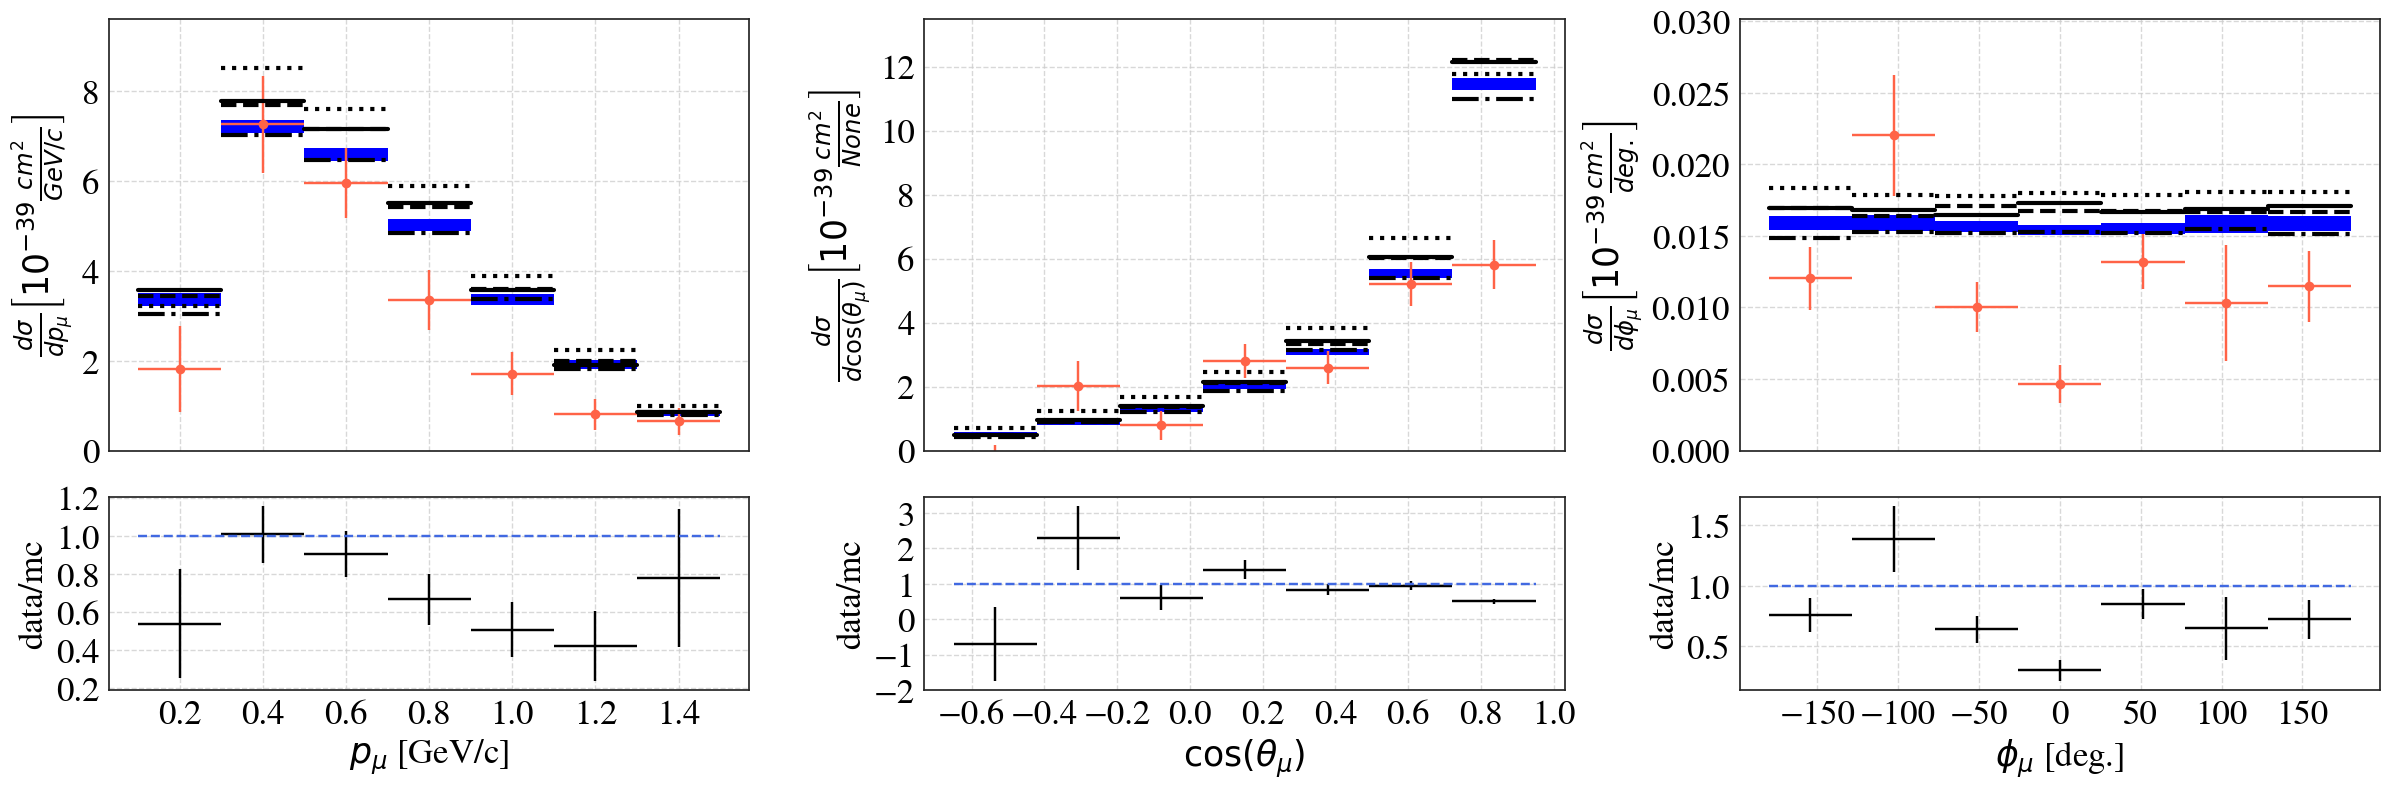

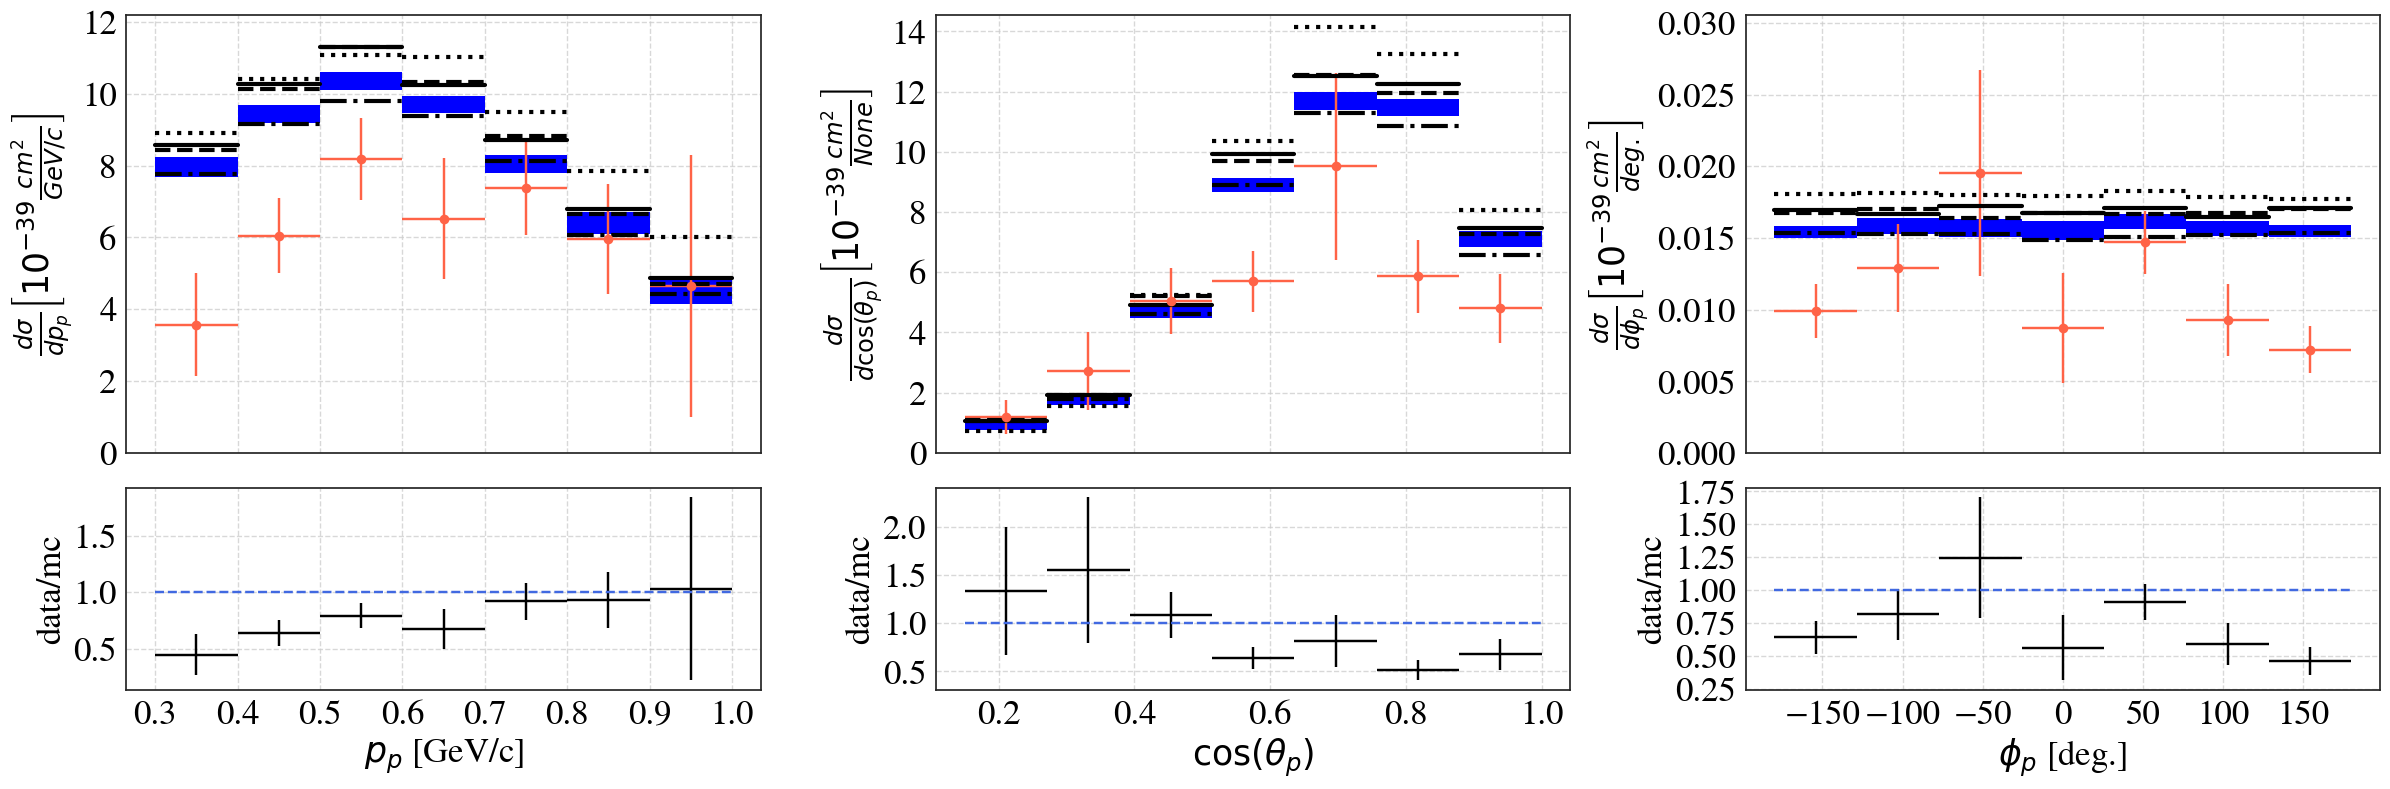

In [295]:
Xsec_dict = draw_Xsecs(do_add_afro_genie = True,do_corr_phi_0=False,debug=0)

# correct $\phi_\mu ~ 0$ and $\phi_p ~ 0$ 
using external weights applied to the events in these bins

In [324]:
correction_phi_0 = dict()
for particle in ['mu','p']:
    Xsec = Xsec_dict['phi('+particle+')']
    Xsec_err = Xsec_dict['phi('+particle+') err']
    bins = Bins['phi('+particle+')']
    n = (len(Bins['phi('+particle+')'])-1)/2
    Xsec_phi_0 = Xsec[n]
    Xsec_phi_not_0 = np.concatenate([Xsec[:n-1],Xsec[n+1:]])
    Xsec_err_phi_not_0 = np.concatenate([Xsec_err[:n-1],Xsec_err[n+1:]])
    weights_average_phi_not_0 = np.average(Xsec_phi_not_0 , weights=1./np.square(Xsec_err_phi_not_0))
    correction_phi_0[particle] = mean_phi_not_0/Xsec_phi_0
    print particle
    print 'Xsec:',Xsec
    print 'Xsec_phi_0:',Xsec_phi_0
    print 'Xsec_phi_not_0:',Xsec_phi_not_0
    print 'weights_average_phi_not_0:',weights_average_phi_not_0
    print 'correction_phi_0:',correction_phi_0[particle]

mu
Xsec: [ 0.01202858  0.02203259  0.01005294  0.00467117  0.01320365  0.01030261
  0.01148397]
Xsec_phi_0: 0.00467117175408
Xsec_phi_not_0: [ 0.01202858  0.02203259  0.01320365  0.01030261  0.01148397]
weights_average_phi_not_0: 0.0129353049971
correction_phi_0: 2.76917777339
p
Xsec: [ 0.0099095   0.01291935  0.01953106  0.00872637  0.01469322  0.00928165
  0.00718875]
Xsec_phi_0: 0.00872637007392
Xsec_phi_not_0: [ 0.0099095   0.01291935  0.01469322  0.00928165  0.00718875]
weights_average_phi_not_0: 0.0100978782484
correction_phi_0: 1.48232367955


In [325]:
for sam in [selected_beam_on,selected_beam_off,selected_CC1p,selected_overlay_concat]:
    sam['W(corr. phi~0)'] = 1
    indices_phi_mu_0 = sam.index[(Bins['phi(mu)'][(len(Bins['phi(mu)'])-1)/2] <= 180./np.pi*sam['reco_Pmu_mcs_phi'])
                              &(180./np.pi*sam['reco_Pmu_mcs_phi'] < Bins['phi(mu)'][(len(Bins['phi(mu)'])-1)/2+1])
                                    ].tolist()
    sam.loc[indices_phi_mu_0,'W(corr. phi~0)'] = correction_phi_0['mu']

    indices_phi_p_0 = sam.index[(Bins['phi(p)'][(len(Bins['phi(p)'])-1)/2] <= 180./np.pi*sam['reco_Pp_phi'])
                              &(180./np.pi*sam['reco_Pp_phi'] < Bins['phi(p)'][(len(Bins['phi(p)'])-1)/2+1])
                                    ].tolist()
    sam.loc[indices_phi_p_0,'W(corr. phi~0)'] = correction_phi_0['p']
print 'done.'

done.


drawing cross-section with Pmu weight
('integrated Xsec: 4.88+/-0.84', 'mc Xsec: 5.66+/-0.15')
nominal afro genie Xsec: 6.08 ± 0.04 e-39 cm2
hA2015 afro genie Xsec: 6.04 ± 0.04 e-39 cm2
hA_SRC afro genie Xsec: 5.47 ± 0.03 e-39 cm2
hA_Tune3 afro genie Xsec: 6.47 ± 0.04 e-39 cm2
drawing cross-section with Pp weight
('integrated Xsec: 4.91+/-1.57', 'mc Xsec: 5.64+/-0.23')
nominal afro genie Xsec: 6.08 ± 0.04 e-39 cm2
hA2015 afro genie Xsec: 6.04 ± 0.04 e-39 cm2
hA_SRC afro genie Xsec: 5.47 ± 0.03 e-39 cm2
hA_Tune3 afro genie Xsec: 6.47 ± 0.04 e-39 cm2


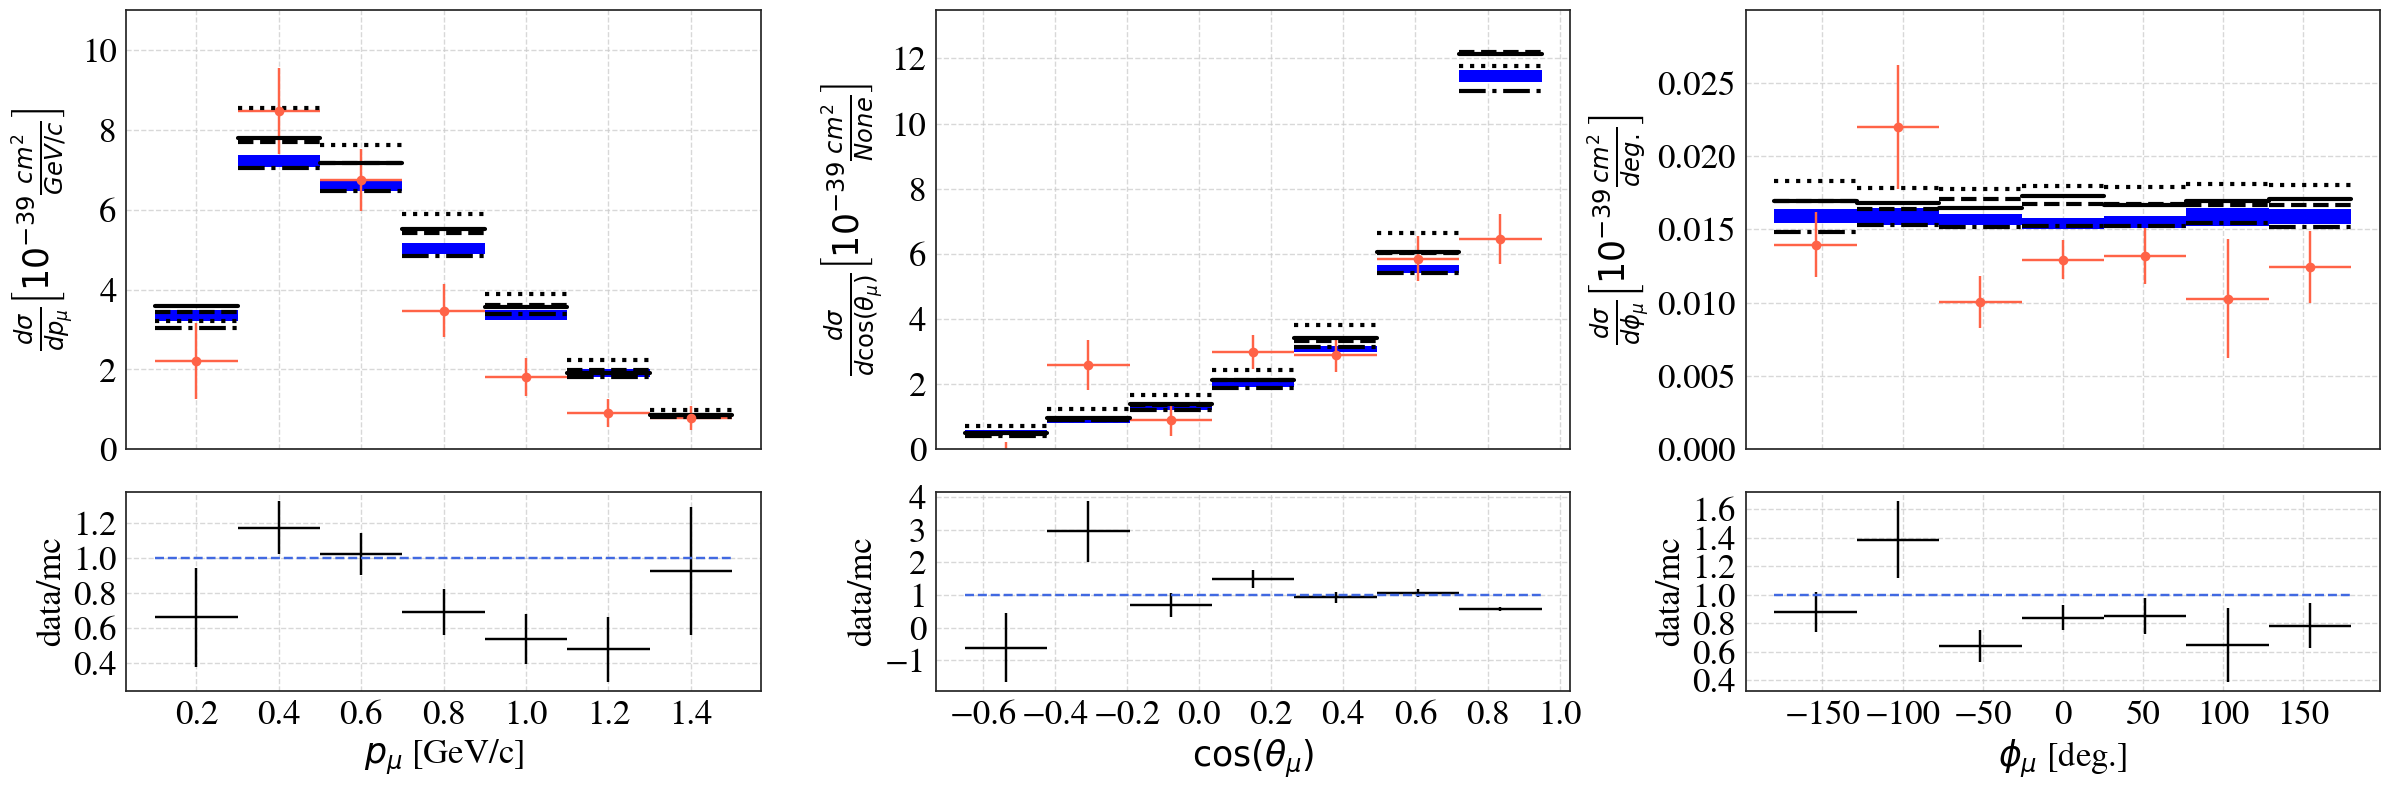

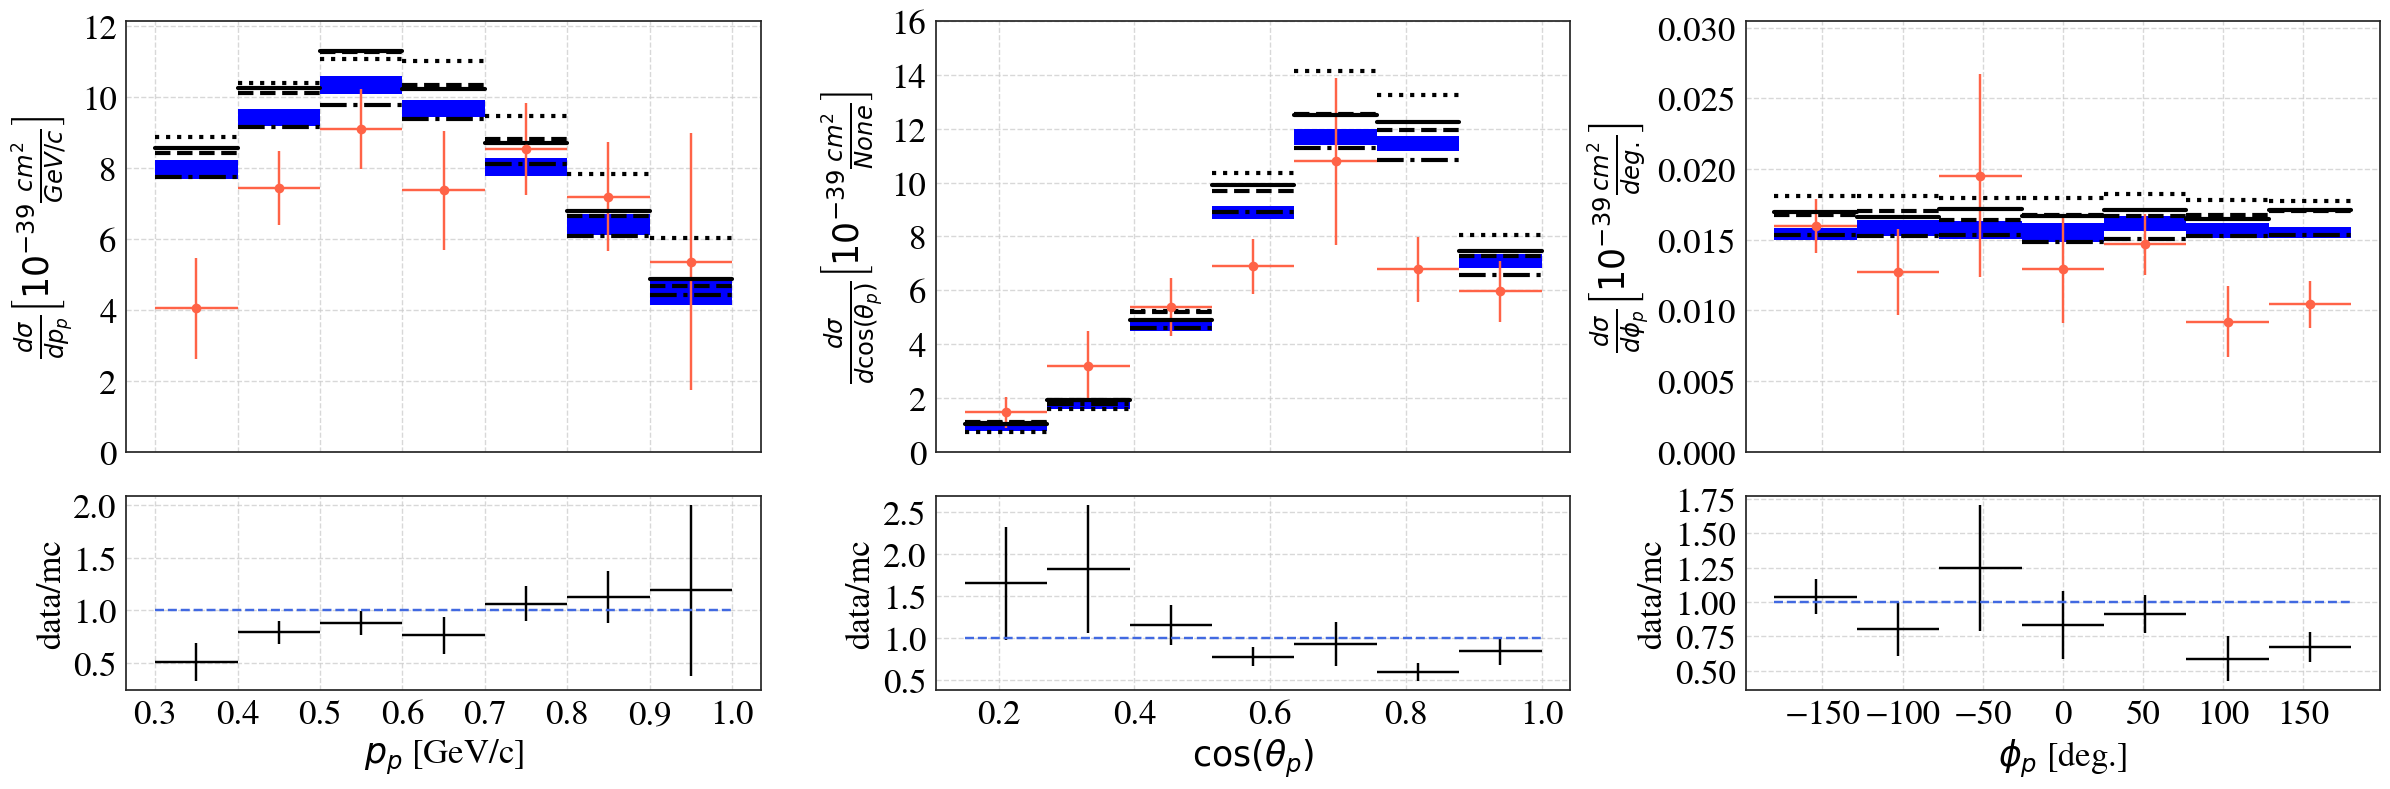

In [326]:
draw_Xsecs(do_add_afro_genie = True,do_corr_phi_0=True,debug=0);